In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.models import Model,Sequential
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
train_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=True,
                              rescale=1./255,
                              validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_set = train_gen.flow_from_directory('Jwellery_Data',
                                         target_size=[262,262],
                                         color_mode='rgb', 
                                         class_mode="binary", 
                                         batch_size = 8, 
                                         shuffle=True,
                                         subset='training') 

val_set = train_gen.flow_from_directory('Jwellery_Data',
                                         target_size=[262,262],
                                         color_mode='rgb', 
                                         class_mode="binary", 
                                         batch_size = 8, 
                                         shuffle=True,
                                         subset='validation') 

test_set = test_gen.flow_from_directory('Jwellery_Data', 
                                        target_size=[262,262],                                    
                                        color_mode='rgb', 
                                        class_mode="binary",
                                        batch_size = 8)
                                      

Found 393 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [4]:
train_set.class_indices

{'necklace': 0, 'ring': 1}

In [5]:
val_set.class_indices

{'necklace': 0, 'ring': 1}

In [6]:
model0 = Sequential()

model0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(262, 262, 3)))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(64, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Flatten())

model0.add(layers.Dense(512, activation='relu'))
model0.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 260, 260, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 130, 130, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

In [8]:
model0.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model0.fit(train_set,
          validation_data=val_set,
          epochs=10)

Epoch 1/10
50/50 [==============================] - 43s 848ms/step - loss: 0.7651 - accuracy: 0.5674 - val_loss: 0.6914 - val_accuracy: 0.3814
Epoch 2/10
50/50 [==============================] - 43s 867ms/step - loss: 0.6349 - accuracy: 0.6590 - val_loss: 0.6779 - val_accuracy: 0.7113
Epoch 3/10
50/50 [==============================] - 51s 1s/step - loss: 0.5029 - accuracy: 0.8295 - val_loss: 0.3732 - val_accuracy: 0.8969
Epoch 4/10
50/50 [==============================] - 45s 898ms/step - loss: 0.2617 - accuracy: 0.9160 - val_loss: 0.4416 - val_accuracy: 0.8969
Epoch 5/10
50/50 [==============================] - 42s 844ms/step - loss: 0.2777 - accuracy: 0.8957 - val_loss: 0.4866 - val_accuracy: 0.8454
Epoch 6/10
50/50 [==============================] - 43s 852ms/step - loss: 0.3043 - accuracy: 0.8779 - val_loss: 0.4747 - val_accuracy: 0.8557
Epoch 7/10
50/50 [==============================] - 42s 831ms/step - loss: 0.1913 - accuracy: 0.9389 - val_loss: 0.3220 - val_accuracy: 0.8969
Ep

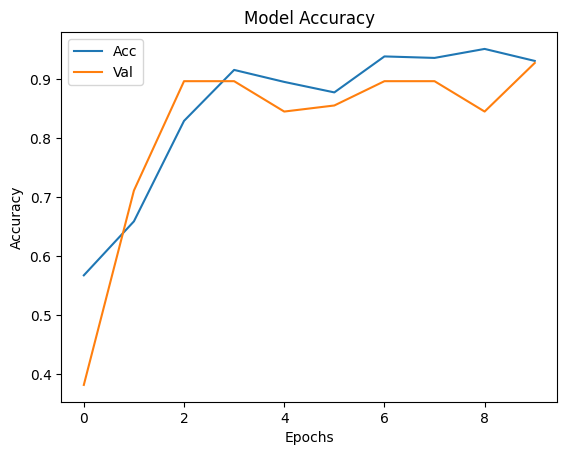

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

In [13]:
result=model0.evaluate(test_set)
print(result)

print('Error on testing dataset: ', result[0])
print('Accuracy on testing dataset: ', result[1])

62/62 [==============================] - 7s 116ms/step - loss: 0.1696 - accuracy: 0.9490
[0.16957908868789673, 0.9489796161651611]
Error on testing dataset:  0.16957908868789673
Accuracy on testing dataset:  0.9489796161651611


In [16]:
model0.save('Jwellary_classifier.h5')